In [116]:
import pandas as pd
from string import punctuation
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Part B

In [117]:
tweets = pd.read_csv('6ktweets.csv')

def remove_punctuation(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def conv_lowercase(x):
    return x.lower()

tweets['clean_tweets'] = tweets['tweets'].apply(remove_punctuation).apply(conv_lowercase)
#tweets

In [118]:
# nltk.download()
tweets['word_freq_list'] = tweets['clean_tweets'].apply(word_tokenize).apply(set).apply(list)

# Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

tweets['word_freq_list'] = tweets['word_freq_list'].apply(remove_stopwords)

# Creating a list of all the words in the comments to count word frequency in the next step
count = []
for i in range(len(tweets)):
    count+=tweets['word_freq_list'][i]

In [119]:
# fetching the frequency of words
from nltk import FreqDist
word_freq = nltk.FreqDist(count)

In [120]:
#identified key issues

#trump issues
immigration = ['mexican', 'wall', 'immigrate', 'mexico', 'illegals', 'immigrants', 'immigrant']
impeach = ['impeachment', 'impeached', 'trumpimpeachment', 'impeachtrump']
foreign_relations = ['ukraine', 'isis', 'syria', 'china' ,'iran']

#biden issues
economy = ['job', 'jobs', 'money', 'taxes', 'taxpayer', 'economys', 'trumpeconomy']
education = [ 'college', 'school' ,'educate' ,'students' , 'student']
gun_control = ['control','weapons', 'weapon','guns', 'gun']

#replacements for trump and biden
trump = ['donaldtrump', 'realdonaldtrump',  'trump2020','trumps', 'donald' ]
biden = ['joebiden', 'joes','bidens', 'joe']

attributes = immigration + impeach+ foreign_relations + economy + trump + biden +education + gun_control

In [121]:
#replacing words with key issues
key_issues = pd.DataFrame()
key_issues['attribute'] = attributes
key_issues['general_attribute'] = ''

key_issues['general_attribute'][0:len(immigration)] = 'immigration'
key_issues['general_attribute'][len(immigration):len(immigration)+len(impeach)] = 'impeach'
key_issues['general_attribute'][len(immigration)+len(impeach):len(immigration)+len(impeach)+len(foreign_relations)] = 'foreign_relations'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)] = 'economy'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+ len(economy):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)] = 'trump'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden)] = 'biden'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+ len(biden):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden) + len(education)] = 'education'
key_issues['general_attribute'][len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+ len(biden)+ len(gun_control):len(immigration)+len(impeach)+len(foreign_relations)+len(economy)+len(trump)+len(biden) + len(education)+len(gun_control)] = 'gun_control'
#key_issues

In [122]:
def word_to_attributes(s):
    s = " ".join(str(x) for x in s)
    for i in key_issues.index.values:
        s = s.replace(key_issues["attribute"][i].lower(),key_issues["general_attribute"][i].lower())
    return s

tweets['comments_attributes_replace'] = tweets['word_freq_list'].apply(word_to_attributes)


# Part C

In [123]:
#making list of tweets that mention trump and list of tweets that mention biden
all_ = tweets['comments_attributes_replace'].apply(word_tokenize).apply(set).apply(list)
all_ = all_.tolist()
t =[]
b =[]
for i in all_: 
    for j in set(i):
        if j == 'trump':
            t.append(i)
        elif j == 'biden':
            b.append(i)             

In [124]:
#calculating total no of tweets that mention each of these key issues
economy =[]
immigration =[]
foreign_relations=[]
impeach=[]
for j in all_:
    for k in j:
        if k == 'economy':
            economy.append(j)
        if k == 'immigration':
            immigration.append(j)
        if k =='foreign_relations':
            foreign_relations.append(j)
        if k == 'impeach':
            impeach.append(j)     

In [125]:
economy_immigration =[]
economy_foreign=[]
economy_impeach=[]
for j in economy:
    for k in j:
        if k == 'immigration':
            economy_immigration.append(j)
        if k =='foreign_relations':
            economy_foreign.append(j)
        if k == 'impeach':
            economy_impeach.append(j)   
len(economy_impeach) 

2

In [126]:
foreign_immigration =[]
foreign_impeach=[]
for j in foreign_relations:
    for k in j:
        if k == 'immigration':
            foreign_immigration.append(j)
        if k == 'impeach':
            foreign_impeach.append(j)   
len(foreign_impeach) 


10

In [127]:
impeach_immigration =[]
for j in impeach:
    for k in j:
        if k == 'immigration':
            impeach_immigration.append(j)
len(impeach_immigration) 


0

In [128]:
#calculating total number of tweets that mention both key issues and trump
economy_trump =[]
immigration_trump =[]
foreign_relations_trump=[]
impeach_trump =[]
trump_biden =[]
for j in t:
    for k in j:
        if k == 'economy':
            economy_trump.append(j)
        if k == 'immigration':
            immigration_trump.append(j)
        if k =='foreign_relations':
            foreign_relations_trump.append(j)
        if k == 'impeach':
            impeach_trump.append(j)   
        if k == 'biden':
            trump_biden.append(j)  
len(trump_biden)            

46

In [129]:
#calculating total number of tweets that mention both key issues and biden
economy_biden =[]
immigration_biden =[]
foreign_relations_biden=[]
impeach_biden =[]
biden_trump =[]
for c in b:
    for b1 in set(c):
        if b1 == 'economy':
            economy_biden.append(c)
            continue;
        if b1 == 'immigration':
            immigration_biden.append(c)
            continue; 
        if b1 =='foreign_relations':
            foreign_relations_biden.append(c) 
            continue;
        if b1 == 'impeach':
            impeach_biden.append(c)  
        if b1 == 'trump':
            biden_trump.append(c)             
len(biden_trump)            

46

In [130]:
#lift analysis for trump and biden

#trump
lift_economy_trump = (len(tweets)*len(economy_trump))/(len(t)*len(economy))
lift_immigration_trump = (len(tweets)*len(immigration_trump))/(len(t)*len(immigration))
lift_foriegn_relations_trump = (len(tweets)*len(foreign_relations_trump))/(len(t)*len(foreign_relations))
lift_impeach_trump = (len(tweets)*len(impeach_trump))/(len(t)*len(impeach))

#biden
lift_economy_biden = (len(tweets)*len(economy_biden))/(len(b)*len(economy))
lift_immigration_biden = (len(tweets)*len(immigration_biden))/(len(b)*len(immigration))
lift_foriegn_relations_biden = (len(tweets)*len(foreign_relations_biden))/(len(b)*len(foreign_relations))
lift_impeach_biden = (len(tweets)*len(impeach_biden))/(len(b)*len(impeach))

#both
lift_trump_biden = (len(tweets)*len(trump_biden))/(len(b)*len(t))

#economy analysis
lift_economy_immigration = (len(tweets)*len(economy_immigration))/(len(immigration)*len(economy))
lift_economy_foreign =(len(tweets)*len(economy_foreign))/(len(economy)*len(foreign_relations))
lift_economy_impeach = (len(tweets)*len(economy_impeach))/(len(impeach)*len(economy))

#foreign relations
lift_foreign_immigration =(len(tweets)*len(foreign_immigration))/(len(immigration)*len(foreign_relations))
lift_foreign_impeach = (len(tweets)*len(foreign_impeach))/(len(impeach)*len(foreign_relations))

lift_impeach_immigration = (len(tweets)*len(impeach_immigration))/(len(impeach)*len(immigration))

In [131]:
data = [[1, lift_trump_biden , lift_economy_trump, lift_immigration_trump, lift_foriegn_relations_trump, lift_impeach_trump], [lift_trump_biden, 1, lift_economy_biden, lift_immigration_biden, lift_foriegn_relations_biden,lift_impeach_biden], [lift_economy_trump,lift_economy_biden,1,lift_economy_immigration,lift_economy_foreign,lift_economy_impeach],[lift_immigration_trump,lift_immigration_biden,lift_economy_immigration,1,lift_foreign_immigration,lift_impeach_immigration],[lift_foriegn_relations_trump,lift_foriegn_relations_biden,lift_economy_foreign,lift_foreign_immigration,1,lift_foreign_impeach],[lift_impeach_trump,lift_impeach_biden,lift_economy_impeach,lift_impeach_immigration,lift_foreign_impeach,1]]
lift = pd.DataFrame(data, columns = ['Trump', 'Biden', 'Economy', 'Immigration', 'Foreign Relations', 'Impeach'])
lift.rename(index = {0: "Trump", 1:"Biden", 2:"Economy", 3:"Immigration", 4:"Foreign Relations", 5:"Impeach"},  inplace = True) 

In [132]:
lift1 = lift.round(3)
lift1

Trump  Biden  Economy  Immigration  Foreign Relations  \
Trump              1.000  1.104    0.678        1.157              1.318   
Biden              1.104  1.000    1.794        0.622              2.490   
Economy            0.678  1.794    1.000        1.351              2.102   
Immigration        1.157  0.622    1.351        1.000              0.000   
Foreign Relations  1.318  2.490    2.102        0.000              1.000   
Impeach            1.713  0.398    0.865        0.000              2.667   

                   Impeach  
Trump                1.713  
Biden                0.398  
Economy              0.865  
Immigration          0.000  
Foreign Relations    2.667  
Impeach              1.000

In [133]:
#forming window around tweets that mention trump and issues

from nltk.tokenize.treebank import TreebankWordDetokenizer
impeach_sentiment_trump=[]
economy_sentiment_trump=[]
immigration_sentiment_trump=[]
foreign_relations_sentiment_trump=[]
for s in impeach_trump:
    for i in range(len(s)):
        if s[i] =='impeach':
            impeach_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))
            
for s in economy_trump:
    for i in range(len(s)):
        if s[i] =='economy':
            economy_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in immigration_trump:
    for i in range(len(s)):
        if s[i] =='immigration':
            immigration_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in foreign_relations_trump:
    for i in range(len(s)):
        if s[i] =='foreign_relations':
            foreign_relations_sentiment_trump.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

In [134]:
#forming window around tweets that mention biden and issues
impeach_sentiment_biden=[]
economy_sentiment_biden=[]
immigration_sentiment_biden=[]
foreign_relations_sentiment_biden=[]
for s in impeach_biden:
    for i in range(len(s)):
        if s[i] =='impeach':
            impeach_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))
            
for s in economy_biden:
    for i in range(len(s)):
        if s[i] =='economy':
            economy_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in immigration_biden:
    for i in range(len(s)):
        if s[i] =='immigration':
            immigration_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

for s in foreign_relations_biden:
    for i in range(len(s)):
        if s[i] =='foreign_relations':
            foreign_relations_sentiment_biden.append(TreebankWordDetokenizer().detokenize(s[i-3:i+3]))

In [135]:
#performing sentiment analysis 

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

def sentiment_analysis(list_):

    sia = SIA()
    r = []

    for i in list_:
        score_ = sia.polarity_scores(i)
        r.append(score_)
    sum_=0
    for i in range(len(r)):
        sum_ = sum_ + r[i]['compound']
    return sum_ 

In [136]:
#getting lift scores for all key issues for each candidate

impeach_sentiment_t= sentiment_analysis(impeach_sentiment_trump)
economy_sentiment_t= sentiment_analysis(economy_sentiment_trump)
immigration_sentiment_t =sentiment_analysis(immigration_sentiment_trump)
foreign_relations_sentiment_t= sentiment_analysis(foreign_relations_sentiment_trump)

impeach_sentiment_b = sentiment_analysis(impeach_sentiment_biden)
economy_sentiment_b= sentiment_analysis(economy_sentiment_biden)
immigration_sentiment_b =sentiment_analysis(immigration_sentiment_biden)
foreign_relations_sentiment_b= sentiment_analysis(foreign_relations_sentiment_biden)


In [137]:
data = [[economy_sentiment_t, immigration_sentiment_t, foreign_relations_sentiment_t, impeach_sentiment_t], [economy_sentiment_b, immigration_sentiment_b, foreign_relations_sentiment_b,impeach_sentiment_b]]
sentiment = pd.DataFrame(data, columns = ['Economy', 'Immigration', 'Foreign Relations', 'Impeach'])
sentiment.rename(index = {0: "Trump", 1:"Biden"},  inplace = True) 

In [138]:
sentiment

Economy  Immigration  Foreign Relations  Impeach
Trump  -1.1159       0.4588             0.0986   1.1539
Biden  -0.6525       0.7845            -1.0684   0.0000

In [139]:
import numpy as np
#Scaling the values to bring to a normalized scale
lift1.replace(0,0.01,inplace=True)
lift1 = np.log(lift1)

In [140]:
#Scaling the two values for better repersentation on the plot

lift1['Foreign Relations']['Trump'] = 0.01
lift1['Foreign Relations']['Biden'] = 0.25
lift1['Trump']['Foreign Relations'] = 0.01
lift1['Biden']['Foreign Relations'] = 0.25
lift1 = lift1.round(3)

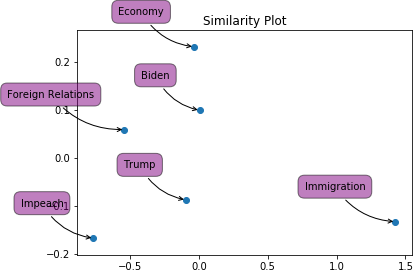

In [141]:
import matplotlib.pyplot as plt

# Calculating the similarity matrix which is the input for plotting MDS plot
similarity_matrix = lift1
np.fill_diagonal(similarity_matrix.values, 0)


# Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(similarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(lift1, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.65', fc = 'purple', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.25'))

plt.title('Similarity Plot')
plt.show()

### Part E

In [142]:
## get top ten cities of each state
Michigan = ['Detroit','Grand Rapids','Warren', 'Sterling Heights','Ann Arbor','Lansing','Flint','Dearborn','Livonia','Troy']
Pennsylvania = ['Philadelphia','Pittsburgh','Allentown','Erie','Reading','Upper Darby','Scranton','Bethlehem','Lancaster','Millcreek']
Wisconsin = ['Milwaukee','Madison','Green Bay','Kenosha','Racine','Appleton','Waukesha','Eau Claire','Oshkosh','Janesville']

In [143]:
## make the city name all lower case
mi = []
for x in Michigan:
    mi.append(x.lower())
    
pen = []
for x in Pennsylvania:
    pen.append(x.lower())
    
wi = []
for x in Wisconsin:
    wi.append(x.lower())

In [144]:
threestates = []
for x in tweets['User Location'].unique():
    if 'michigan' in str(x).lower() or 'pennsylvania'in str(x).lower() or 'wisconsin' in str(x).lower() or str(x).lower().endswith(', mi') or str(x).lower().endswith('pa') or str(x).lower().endswith('wi') or str(x).lower() in mi or str(x).lower() in pen or str(x).lower() in wi:
        threestates.append(x)

threestates

['Michigan, USA',
 'Pennsylvania',
 'Green Bay',
 'Pennsylvania, USA',
 'Verona WI',
 'Altoona PA',
 'Wisconsin, USA',
 'Lehigh Valley PA',
 'DELCO Phila, Pa',
 'Philadelphia, PA',
 'Eastern PA',
 'Warren, PA',
 'Butler, PA',
 'Philadelphia',
 'Somewhere in Pennsylvania!',
 'Little Chute, WI',
 'Easton, PA',
 'Holt, MI',
 'Grand Blanc, MI',
 'Pittsburgh, PA',
 'Tempe, AZ & Door County, WI',
 'Waterford, PA',
 'Lebanon, PA',
 'Monaca, PA',
 'Wisconsin, USA ',
 'Loganville, PA',
 'Michigan U.S.A.',
 'Near Pittsburgh PA',
 'Western Pa',
 'Detroit, MI',
 'Huntingdon Valley, PA',
 'Oakland County, Mi',
 'Cranberry Township, PA',
 'Hobart, WI',
 'Lancaster, PA',
 'Clinton, MI',
 'Southfield, MI',
 'Michigan',
 'Lock Haven, PA',
 'Ligonier, PA',
 'Davidsville, PA',
 'New York / Pennsylvania',
 'Mt. Pleasant Michigan',
 'Milwaukee',
 'Superior, WI',
 'Port Huron, MI',
 'PA']

In [145]:
for index, row in tweets.iterrows():
    if row['User Location'] in threestates:
        tweets.loc[index,'User Location'] = 'battleground'

In [146]:
data1 = tweets.copy()
data1[data1['User Location'] == 'battleground']

Unnamed: 0              Date  \
13            13   10/14/2019 0:35   
32            32   10/14/2019 0:24   
54            54   10/14/2019 0:04   
155          155  10/13/2019 22:45   
164          164  10/13/2019 22:38   
...          ...               ...   
5888        5888   10/11/2019 0:47   
5900        5900   10/11/2019 0:46   
5905        5905   10/11/2019 0:44   
5908        5908   10/11/2019 0:44   
5933        5933   10/11/2019 0:39   

                                                 tweets User Location  \
13    @NBCNews Unfounded?  You people are nuts!  Oh ...  battleground   
32                  @BillKristol Drunk again? #MAGA2020  battleground   
54    @DavidJHarrisJr @realDonaldTrump That would of...  battleground   
155   No matter how hard they try to hinder our abil...  battleground   
164   @thehill @realDonaldTrump You don’t speak for ...  battleground   
...                                                 ...           ...   
5888  I agree, @charliekirk11 !#MAGA2020 https://t.c...  battleground   
5900  Minneapolis police officer running against Ilh...  battleground   
5905  David Bossie: Impeachment inquiry? No, America...  battleground   
5908  @SpeakerPelosi @RepAdamSchiff Fact:  only way ...  battleground   
5933  Time to support the beautiful women of Team #M...  battleground   

        hashtag                                       clean_tweets  \
13    #MAGA2020  nbcnews unfounded  you people are nuts  oh wai...   
32    #MAGA2020                   billkristol drunk again maga2020   
54    #MAGA2020  davidjharrisjr realdonaldtrump that would of m...   
155   #MAGA2020  no matter how hard they try to hinder our abil...   
164   #MAGA2020  thehill realdonaldtrump you don’t speak for th...   
...         ...                                                ...   
5888  #MAGA2020  i agree charliekirk11 maga2020 httpstcovo4vppymfe   
5900  #MAGA2020  minneapolis police officer running against ilh...   
5905  #MAGA2020  david bossie impeachment inquiry no americans ...   
5908  #MAGA2020  speakerpelosi repadamschiff fact  only way tru...   
5933  #MAGA2020  time to support the beautiful women of team ma...   

                                         word_freq_list  \
13    [nbcnews, people, nuts, never, wait, maga2020,...   
32                       [drunk, billkristol, maga2020]   
54    [better, realdonaldtrump, would, flights, seei...   
155   [stay, trump, hard, hinder, httpstcoyzum2k89u3...   
164   [american, maga2020, magats, public, trumpers,...   
...                                                 ...   
5888  [charliekirk11, agree, httpstcovo4vppymfe, mag...   
5900  [says, absentee, happ…, calls, police, ilhan, ...   
5905  [conclusion, inquiry, david, bossie, impeachme...   
5908  [2020, realdonaldtrump, impeach, trump, repada...   
5933  [🇺🇸🇺🇸🇺🇸, httpstco4ky78uajfs, trump2020, women,...   

                            comments_attributes_replace  
13    nbcnews people nuts never wait maga2020 unfoun...  
32                           drunk billkristol maga2020  
54    better realtrump would flights seeing week dav...  
155   stay trump hard hinder httpstcoyzum2k89u3 matt...  
164   american maga2020 magats public trumpers thehi...  
...                                                 ...  
5888    charliekirk11 agree httpstcovo4vppymfe maga2020  
5900  says absentee happ… calls police ilhan httpstc...  
5905  conclusion inquiry david bossie impeach witnes...  
5908  2020 realtrump impeach trump repadamschiff spe...  
5933  🇺🇸🇺🇸🇺🇸 httpstco4ky78uajfs trump women like bea...  

[144 rows x 8 columns]

In [147]:
data1 = data1.dropna().copy()
data1['tweets_battle'] = data1['User Location']+ data1['clean_tweets']
# data1.loc[data1['User Location'] == 'battleground','tweets_battle'] = data1[]+ data1['tweets']
data1

Unnamed: 0             Date  \
0              0  10/14/2019 0:47   
1              1  10/14/2019 0:46   
3              3  10/14/2019 0:45   
4              4  10/14/2019 0:45   
5              5  10/14/2019 0:44   
...          ...              ...   
5993        5993  10/11/2019 0:19   
5994        5994  10/11/2019 0:19   
5995        5995  10/11/2019 0:18   
5997        5997  10/11/2019 0:17   
5998        5998  10/11/2019 0:17   

                                                 tweets       User Location  \
0     Why do they keep electing elites that have mil...       United States   
1     No Shame! \r\nThanks @carlosrossimc for the ve...       United States   
3     @realDonaldTrump @FoxNews needs to dump Wallac...          Boston, MA   
4     President Trump is 100% Correct on Syria Withd...  Florida of course!   
5                  @JoeBiden Poor Joe...#MAGA #MAGA2020      Corpus Christi   
...                                                 ...                 ...   
5993  Thank you to all my friends for sharing pictur...      Minnesota, USA   
5994  Thank you to all my friends for sharing pictur...      Minnesota, USA   
5995  Trump’s children take in millions overseas as ...        Portland, OR   
5997  🚨BREAKING🚨\r\n#Whistleblower Worked With #JoeB...                 USA   
5998  Gosh, imagine that- a spineless business failu...        Freehold, NJ   

        hashtag                                       clean_tweets  \
0     #MAGA2020  why do they keep electing elites that have mil...   
1     #MAGA2020  no shame \r\nthanks carlosrossimc for the vers...   
3     #MAGA2020  realdonaldtrump foxnews needs to dump wallace ...   
4     #MAGA2020  president trump is 100 correct on syria withdr...   
5     #MAGA2020                     joebiden poor joemaga maga2020   
...         ...                                                ...   
5993  #MAGA2020  thank you to all my friends for sharing pictur...   
5994  #MAGA2020  thank you to all my friends for sharing pictur...   
5995  #MAGA2020  trump’s children take in millions overseas as ...   
5997  #MAGA2020  🚨breaking🚨\r\nwhistleblower worked with joebid...   
5998  #MAGA2020  gosh imagine that a spineless business failure...   

                                         word_freq_list  \
0     [themmaga, httpstcoxksbijvqcn, trump2020, doll...   
1     [thanks, carlosrossimc, kag, magachallenge, ht...   
3     [httpstcoaukdrtpmkc, dump, switch, shep👉🏻🚪, i…...   
4     [⁦potus⁩, trump, last, president, refuge, why…...   
5                   [poor, maga2020, joebiden, joemaga]   
...                                                 ...   
5993  [rally, trump, president, friends, sharing, mi...   
5994  [rally, trump, president, friends, sharing, mi...   
5995  [president, biden, slams, kag2020, httpstcof4j...   
5997  [worked, joebidencorruption, httpstcox0cjtigzh...   
5998  [notorious, spineless, pay, imagine, creditors...   

                            comments_attributes_replace  \
0     themmaga httpstcoxksbijvqcn trump dollars keep...   
1     thanks carlosrossimc kag magachallenge httpstc...   
3     httpstcoaukdrtpmkc dump switch shep👉🏻🚪 i… like...   
4     ⁦potus⁩ trump last president refuge why… https...   
5                         poor maga2020 biden bidenmaga   
...                                                 ...   
5993  rally trump president friends sharing minnesot...   
5994  rally trump president friends sharing minnesot...   
5995  president biden slams kag2020 httpstcof4j5mupj...   
5997  worked bidencorruption httpstcox0cjtigzhe whis...   
5998  notorious spineless pay imagine creditors http...   

                                          tweets_battle  
0     United Stateswhy do they keep electing elites ...  
1     United Statesno shame \r\nthanks carlosrossimc...  
3     Boston, MArealdonaldtrump foxnews needs to dum...  
4     Florida of course!president trump is 100 corre...  
5          Corpus Christijoebiden poor joemaga maga2020  
...  

In [148]:
people_trump = ['trump','battleground']
trump_df = pd.DataFrame(columns = people_trump)

def candidates_mentioned(item):
    if p.lower() in item.lower():
        return 1
    else:
        return 0
      
for p in people_trump:
    trump_df[p] = data1['tweets_battle'].apply(candidates_mentioned)
    
    
    
people_dem = ['biden','battleground']
dem_df = pd.DataFrame(columns = people_dem)

def candidates_mentioned(item):
    if p.lower() in item.lower():
        return 1
    else:
        return 0
      
for p in people_dem:
    dem_df[p] = data1['tweets_battle'].apply(candidates_mentioned)

In [149]:
liftratio1=pd.DataFrame(columns = people_trump)
for i in range(len(people_trump)):
    new_list = []
    for j in range(len(people_trump)):
        if (i!=j):
            numerator = ((trump_df[people_trump[i]] + trump_df[people_trump[j]]) > 1).sum()
            denominator = trump_df[people_trump[j]].sum()*trump_df[people_trump[i]].sum()
            lift = numerator*len(trump_df)/denominator
            liftratio1.loc[people_trump[i],people_trump[j]] = lift
print ('Below are the lift ratios among Trump and battleground')
liftratio1

Below are the lift ratios among Trump and battleground


trump battleground
trump             NaN      1.07154
battleground  1.07154          NaN

In [150]:
liftratio2=pd.DataFrame(columns = people_dem)
for i in range(len(people_dem)):
    new_list = []
    for j in range(len(people_dem)):
        if (i!=j):
            numerator = ((dem_df[people_dem[i]] + dem_df[people_dem[j]]) > 1).sum()
            denominator = dem_df[people_dem[j]].sum()*dem_df[people_dem[i]].sum()
            lift = numerator*len(dem_df)/denominator
            liftratio2.loc[people_dem[i],people_dem[j]] = lift
print ('Below are the lift ratios among Biden and battleground')
liftratio2

Below are the lift ratios among Biden and battleground


biden battleground
biden           NaN        1.886
battleground  1.886          NaN

## Lift analysis

In [151]:
liftdf = pd.DataFrame(index=['Battleground'],columns=['Trump','Biden'])
liftdf.iloc[0,0]=liftratio1.iloc[0,1]
liftdf.iloc[0,1]=liftratio2.iloc[0,1]
liftdf

Trump  Biden
Battleground  1.07154  1.886

In [152]:
data2 = data1[data1['User Location'] == 'battleground']

In [153]:
#get the compound sentiment score of tweets mentioned Trump
trumpsenti=[]
analyzer = SIA()
for index, row in data2.iterrows():
    if 'trump' in row['clean_tweets'].lower():
        vs = analyzer.polarity_scores(row['clean_tweets'])
        trumpsenti.append(vs['compound'])

In [154]:
#get the compound sentiment score of tweets mentioned Biden
demsenti=[]
analyzer = SIA()
for index, row in data2.iterrows():
    if 'biden' in row['clean_tweets'].lower():
        vs = analyzer.polarity_scores(row['clean_tweets'])
        demsenti.append((vs['compound']))

In [155]:
# take the average semtiment score of each tweet
import numpy as np
sentimentdf = pd.DataFrame(index=['Battleground'],columns=['Trump','Biden'])
sentimentdf.iloc[0,0]=np.mean(trumpsenti)
sentimentdf.iloc[0,1]=np.mean(demsenti)
sentimentdf

Trump      Biden
Battleground  0.161143  0.0365636

In [156]:
# a more detailed report of people's sentiment when they talk about Trump
trumppos = 0
trumpneg = 0
for x in trumpsenti:
    if x>0:
        trumppos+=1
    if x<0:
        trumpneg+=1
trumppos = trumppos/len(trumpsenti)
trumpneg = trumpneg/len(trumpsenti)


print(str(trumppos*100) +"% of tweets have postive sentiments regarding to Trump in battleground.")
print(str((1-trumpneg-trumppos)*100) +"% of tweets have neutral sentiments regarding to Trump in battleground.")
print(str(trumpneg*100) +"% of tweets have negitive sentiments regarding to Trump in battleground.")

46.26865671641791% of tweets have postive sentiments regarding to Trump in battleground.
34.32835820895522% of tweets have neutral sentiments regarding to Trump in battleground.
19.402985074626866% of tweets have negitive sentiments regarding to Trump in battleground.


In [157]:
# a more detailed report of people's sentiment when they talk about Biden
bidenpos = 0
bidenneg = 0
for x in demsenti:
    if x>0:
        bidenpos+=1
    if x<0:
        bidenneg+=1
        
bidenpos = bidenpos/len(demsenti)
bidenpos = bidenneg/len(demsenti)


print(str(bidenpos*100) +"% of tweets have postive sentiments regarding to Biden in battleground.")
print(str((1-bidenpos-bidenpos)*100) +"% of tweets have neutral sentiments regarding to Biden in battleground.")
print(str(bidenpos*100) +"% of tweets have negitive sentiments regarding to Biden in battleground.")

27.27272727272727% of tweets have postive sentiments regarding to Biden in battleground.
45.45454545454546% of tweets have neutral sentiments regarding to Biden in battleground.
27.27272727272727% of tweets have negitive sentiments regarding to Biden in battleground.


# Part F

According to the lift analysis, Trump is associated more with immigration and impeach issues than Biden. While Biden is more associated with economy and foreign relations issues. According to the sentiment analysis, people have very diverse sentiments of Trump and Biden on different issues. As for economy issue, people’s overall sentiment of Trump is positive. On the other hand, Biden is not favorable because the sentiment score is negative. For immigration issue, Biden is favorable, and Trump is not liked. As for foreign relations, both candidates are not favorable. However, people still prefer Trump compared to Biden. For impeach issue, Trump is more favorable than Biden. And people’ssentiment of Biden is neutral on impeach issue.Trump should improve his reputation on immigration and foreign relation issues, because on these issues Biden is favorable. Our recommendation is that he should not post too many twittes abouthis politics. Even he wants to post something on Twitter, he should not show the aggressiveness because it will make people dislike him. Especially for immigration and foreign relation issues, on whichpeople show negative sentiments. As for Biden, he should work on improving his recognition on solvingeconomy and impeach issues, since Trump is preferred compared to him on these two issues. What’s more, he should increase the frequency of posting twittes. Because Trump posts a lot, and it will shift the focus away from him.  According to the result of lift analysis Trump is not frequently discussed in Michigan, Pennsylvania and Wisconsin. The probability of Trump been discussed is less than random selection. Compared to Trump, Biden is much more likely to be discussed by people in Michigan, Pennsylvania and Wisconsin. The probability of Biden been discussed is significantly higher than random selection. According to the result of sentiment analysis, for people in Michigan, Pennsylvania and Wisconsin, theirsentiments about Trump is more positive than their sentiments about Biden. In other words, Trump is more favorable in Michigan, Pennsylvania and Wisconsin, compared to Biden. After combining the lift analysis and the sentiment analysis, we are confidence to conclude that although Biden is mentioned more in people’s discussions, it is likely that those mentions are close to neutral sentiments. Although Trump is mentioned less frequently, people in Michigan, Pennsylvania and Wisconsin like him more than Biden. Trump should give more speeches in Michigan, Pennsylvania and Wisconsin. Because he is favorable compared to Biden. By giving more speeches, people will discuss him more, and it is beneficial. Biden should participate more on Twitter and speak for people’s benefits; therefore, he would have a chance to have higher sentiment score than Trump.